In [ ]:
%pip install pandas numpy matplotlib tensorflow keras

In [ ]:
%pip install xlrd

In [2]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense

from matplotlib import pyplot as plt
from matplotlib import ticker as ticker

In [3]:
train_data = pd.read_excel(r"./data/Data_Train.xlsx", sheet_name="Sheet1")

In [4]:
train_data = train_data.dropna(how='any',axis=0)
train_data = train_data.to_numpy()

In [5]:
train_data[:,0] = np.vectorize(lambda i: str(i.split(" ")[0]))(train_data[:,0]).astype(str)

In [6]:
# assume `Price` in Lakh
data_params = ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']

In [7]:
def one_hot_encode(data:np.ndarray, n:int, categories:list = None) -> np.ndarray:
    """
    Convert the given input into one-hot-encoding.
    Use the given categories, if exist then convert the data,
    else convert indices to one-hot
    """

    try:
        assert categories is None
        data = data.astype(int)
    except (ValueError, AssertionError):
        data = np.vectorize(categories.index)(data)
    finally:
        targets = np.array(data).reshape(-1)
    
    return int(list(np.eye(n)[targets][0]).index(1))

In [9]:
one_encode_params = ["Name", "Location", "Year", "Fuel_Type", "Transmission", "Owner_Type"]

def encode_params(data, params):
    ix = map(data_params.index, params) 
    encoded_params = {}

    for i in ix:
        m = data_params[i]
        encoded_params[m] = [np.unique(data[:,i].astype(str), axis=0).tolist(), None]
        
        if i == "Year":
            encoded_params[m][1] = np.vectorize(lambda x: 2020 - x)(data[:,i])
        else:
            data[:,i] = encoded_params[m][1] = list(map(lambda x: one_hot_encode(x, len(encoded_params[m][0]), encoded_params[m][0]), data[:,i].astype(str)))
    
    return encoded_params

In [10]:
categories = encode_params(train_data, one_encode_params)

In [11]:
def convert_prices(price):
    p = price.split(" ")
    price = float(p[0])
    cr = p[1] == "Cr"

    return price if not cr else 100*price

train_data[:,11] = np.vectorize(convert_prices)(train_data[:,11]).astype(float)

In [12]:
# km/kg = kmpl
train_data[:,7] = np.vectorize(lambda i: float(i.split(" ")[0]))(train_data[:,7]).astype(float)

In [13]:
train_data[:,8] = np.vectorize(lambda i: float(i.split(" ")[0]))(train_data[:,8]).astype(float)
train_data[:,9] = np.vectorize(lambda i: float(i.split(" ")[0]))(train_data[:,9]).astype(float)

In [14]:
train_data = train_data.astype(float)

No handles with labels found to put in legend.


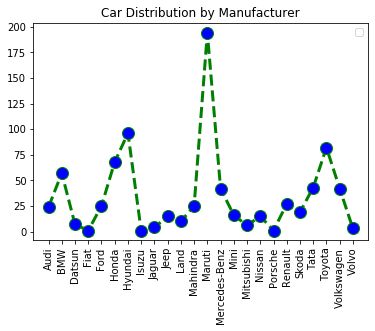

In [15]:
# distribution by brand
x = np.unique(train_data[:,0], axis=0)
y = list(map(lambda x: sum(train_data[:,0] == x), x))

plt.xticks(x, categories['Name'][0], fontsize=10, rotation=90)
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
plt.title('Car Distribution by Manufacturer') 
plt.legend() 
plt.show()


No handles with labels found to put in legend.


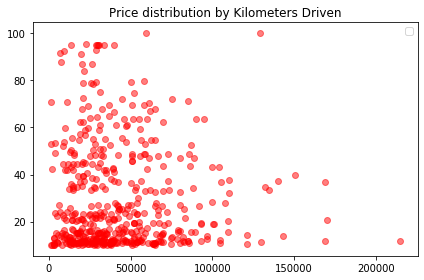

In [23]:
x = train_data[:,3]
tot = len(train_data[:,11])
y = train_data[:,11]

plt.scatter(x, y, color='red', alpha=0.5)
plt.title('Price distribution by Kilometers Driven') 
plt.legend() 
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


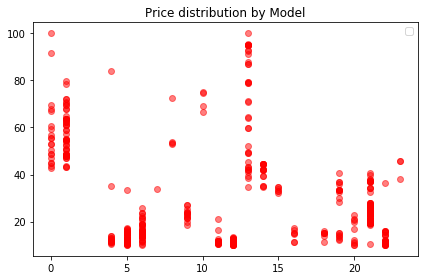

In [27]:
x = train_data[:,0]
tot = len(train_data[:,11])
y = train_data[:,11]

plt.scatter(x, y, color='red', alpha=0.5)
plt.title('Price distribution by Model') 
plt.legend() 
plt.tight_layout()
plt.show()

aasas

No handles with labels found to put in legend.


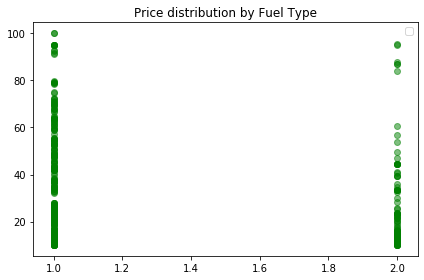

In [24]:
x = train_data[:,4]
tot = len(train_data[:,11])
y = train_data[:,11]

plt.scatter(x, y, color='green', alpha=0.5)
plt.title('Price distribution by Fuel Type') 
plt.legend() 
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


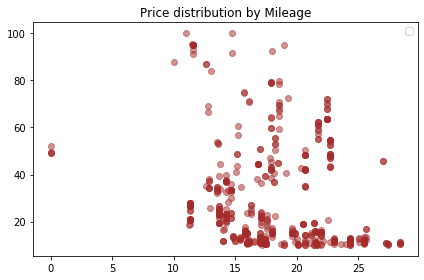

In [28]:
x = train_data[:,7]
tot = len(train_data[:,11])
y = train_data[:,11]

plt.scatter(x, y, color='brown', alpha=0.5)
plt.title('Price distribution by Mileage') 
plt.legend() 
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


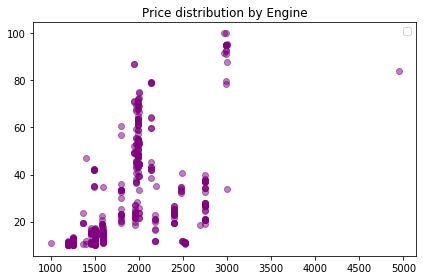

In [29]:
x = train_data[:,8]
tot = len(train_data[:,11])
y = train_data[:,11]

plt.scatter(x, y, color='purple', alpha=0.5)
plt.title('Price distribution by Engine') 
plt.legend() 
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


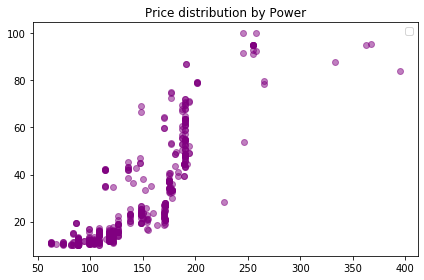

In [30]:
x = train_data[:,9]
tot = len(train_data[:,11])
y = train_data[:,11]

plt.scatter(x, y, color='purple', alpha=0.5)
plt.title('Price distribution by Power') 
plt.legend() 
plt.tight_layout()
plt.show()

From the above analysis, it's quite clear that more data are under 0-100 price range. Thus yielding a better regression after training. Let's filter out the train data then. Values above 100 are too extreme and have very less data

In [21]:
train_data = train_data[train_data[:,11] <= 100]
train_data = train_data[train_data[:,11] >= 10]

No handles with labels found to put in legend.


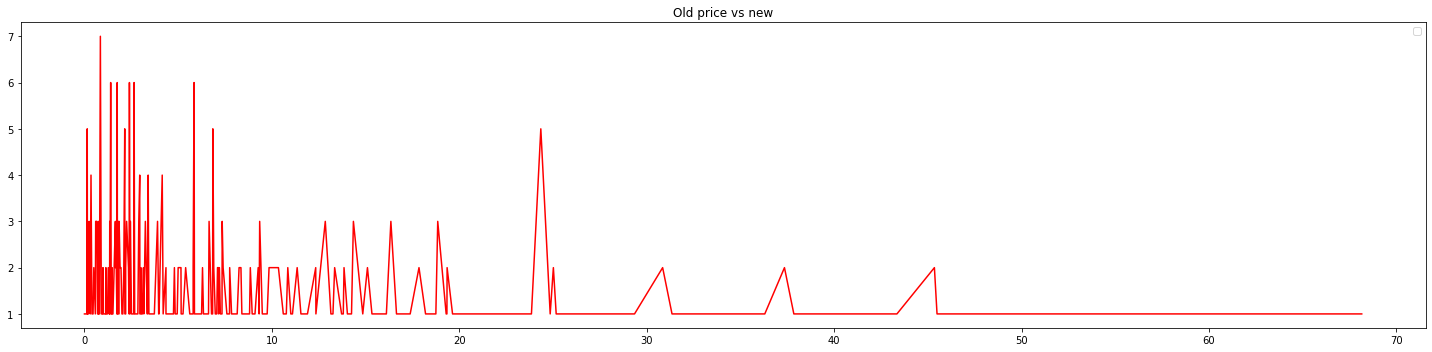

In [31]:
x = train_data[:,12]
y = list(map(lambda x: abs(x[0]-y[1]), zip(x, train_data[:,11])))
x = np.unique(y)

plt.figure(figsize=(20, 5))

plt.plot(x, list(map(y.count, x)), color='red')
plt.title('Old price vs new') 
plt.legend() 
plt.tight_layout()
plt.show()

In [32]:
{i:data_params[i] for i in range(len(data_params))}

{0: 'Name',
 1: 'Location',
 2: 'Year',
 3: 'Kilometers_Driven',
 4: 'Fuel_Type',
 5: 'Transmission',
 6: 'Owner_Type',
 7: 'Mileage',
 8: 'Engine',
 9: 'Power',
 10: 'Seats',
 11: 'New_Price',
 12: 'Price'}

In [102]:
train_data[:,(2,3,6,7,8,9)][0], train_data[0]

(array([1.200e+01, 3.600e+04, 0.000e+00, 1.136e+01, 2.755e+03, 1.715e+02]),
 array([2.100e+01, 9.000e+00, 1.200e+01, 3.600e+04, 1.000e+00, 0.000e+00,
        0.000e+00, 1.136e+01, 2.755e+03, 1.715e+02, 8.000e+00, 2.100e+01,
        1.750e+01]))

In [103]:
def prepare_train_data():
    return train_data[:,(2,3,6,7,8,9)], train_data[:,11]

trainX, trainY = prepare_train_data()

In [104]:
def build_model(inputShape):
    model = Sequential()
    model.add(Dense(16, activation='relu', input_shape=inputShape))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='AdaGrad', loss='mse')

    return model

In [105]:
model = build_model(trainX[0].shape)

In [106]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_32 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [107]:
model.fit(trainX, trainY, epochs=450)

 207.7166
Epoch 222/450
496/496 [==============================] - 0s 58us/step - loss: 202.7484
Epoch 223/450
496/496 [==============================] - 0s 54us/step - loss: 193.3502
Epoch 224/450
496/496 [==============================] - 0s 58us/step - loss: 185.8884
Epoch 225/450
496/496 [==============================] - 0s 63us/step - loss: 186.4225
Epoch 226/450
496/496 [==============================] - 0s 71us/step - loss: 190.6229
Epoch 227/450
496/496 [==============================] - 0s 62us/step - loss: 188.1107
Epoch 228/450
496/496 [==============================] - 0s 53us/step - loss: 186.5314
Epoch 229/450
496/496 [==============================] - 0s 54us/step - loss: 181.9147
Epoch 230/450
496/496 [==============================] - 0s 54us/step - loss: 198.2889
Epoch 231/450
496/496 [==============================] - 0s 54us/step - loss: 196.3687
Epoch 232/450
496/496 [==============================] - 0s 48us/step - loss: 192.3191
Epoch 233/450
496/496 [==========

In [108]:
train_data[22]

array([1.200e+01, 9.000e+00, 1.200e+01, 2.000e+04, 1.000e+00, 1.000e+00,
       0.000e+00, 2.430e+01, 1.248e+03, 8.850e+01, 5.000e+00, 1.198e+01,
       9.000e+00])

In [109]:
example_predict = np.array(trainX[33:46])
prediction = model.predict(example_predict)
prediction, trainY[33:46]

(array([[ 43.1396  ],
        [ 63.103954],
        [ 40.543896],
        [ 43.00593 ],
        [ 47.84895 ],
        [ 11.869091],
        [ 25.199657],
        [ 64.72896 ],
        [ 42.72468 ],
        [ 44.118603],
        [ 24.502636],
        [102.29805 ],
        [ 47.469677]], dtype=float32),
 array([58.67, 28.37, 72.64, 36.15, 44.59, 12.  , 14.65, 53.72, 33.91,
        60.88, 12.51, 95.38, 60.59]))

No handles with labels found to put in legend.


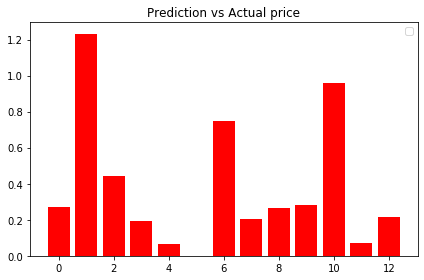

In [110]:
x = np.arange(len(example_predict))
y1 = trainY[33:46]
y2 = prediction.flatten()

y = list(map(lambda x: abs(round(x[0]-x[1]))/x[0], zip(y1, y2)))

plt.bar(x, y, color='red')
plt.title('Prediction vs Actual price') 

plt.legend() 
plt.tight_layout()
plt.show()

In [100]:
model.save('./model/model-v1.model')

In [101]:
model.save_weights('./model/model-v1-weights.h5')

Now, testing the data on test data.


In [ ]:
test_data = 